In [1]:
###Import
import sys

#import geobayes_simple as gs
from matplotlib import pyplot as plt
from IPython.core.display import Image

%matplotlib inline
import pymc as pm
from pymc.Matplot import plot
import numpy as np
from IPython.core.pylabtools import figsize
figsize(15, 6)
import seaborn
seaborn.set_context(font_scale=2)
seaborn.set_style("white")

from pymc import graph

import scipy.optimize as sop
import scipy.stats as stats
import matplotlib.mlab as mlab

In [2]:
fault_block = np.load('block_faults.npy') #1=hanging wall; 0=footwall
lith_block = np.load('block_lith.npy')
non_res = np.load('Non_res.npy')
res = np.load('res.npy')
#res = np.load('res.npy').astype(int)
seal = np.load('seal.npy')
res2 = np.load('sec_res.npy')

In [363]:
resres = np.vstack({tuple(row) for row in res})
print(resres)

[[ 36.          47.          19.91866888]
 [ 30.          49.          21.65040868]
 [  4.          12.          25.26278234]
 ..., 
 [ 10.18610644   2.          20.        ]
 [  2.           6.          24.57959283]
 [ 46.          31.          17.77826476]]


In [364]:
print(fault_block.reshape(50,50,50))

[[[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 [[ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  ..., 
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]
  [ 1.  1.  1. ...,  1.  1.  1.]]

 ..., 
 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  

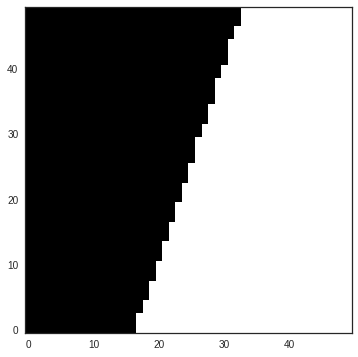

In [365]:
plt.imshow(fault_block.reshape(50,50,50)[:,25,:].T, origin='lower')

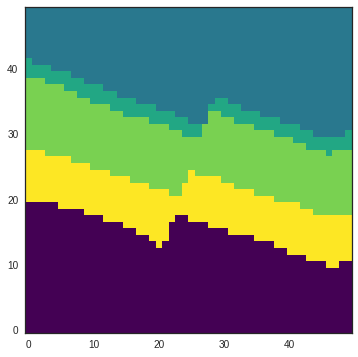

In [366]:
plt.imshow(lith_block.reshape(50,50,50)[:,25,:].T, origin='lower', cmap='viridis')

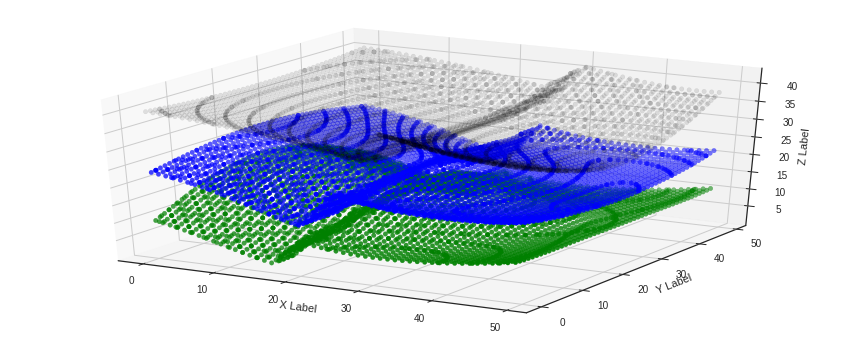

In [367]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(res[:,0], res[:,1], res[:,2], c="b")
ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black', alpha=0.1)
ax.scatter(non_res[:,0], non_res[:,1], non_res[:,2], c='g')
#ax.scatter(maxmin[:,0], maxmin[:,1], maxmin[:,2], c='r', s = 100)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [368]:
#fault_block_bool = fault_block.astype(bool)
#print(fault_block_bool)
#
#for i in lith_block:
#    if fault_block_bool[i] == False:
#        lith_block[i] = 10
#
#print(lith_block)

#print(fault_block.astype(bool))

#lith_block2 = (lith_block[fault_block.astype(bool)])
#print(lith_block2.shape)

lith_block[fault_block.astype(bool)] = 6
lith_block.shape
print(lith_block.reshape(50,50,50))

[[[ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  ..., 
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]]

 [[ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  ..., 
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]]

 [[ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  ..., 
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]
  [ 6.  6.  6. ...,  6.  6.  6.]]

 ..., 
 [[ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  ..., 
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]]

 [[ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  2.  2.  2.]
  ..., 
  [ 0.  0.  0. ...,  2.  2.  2.]
  [ 0.  0.  0. ...,  

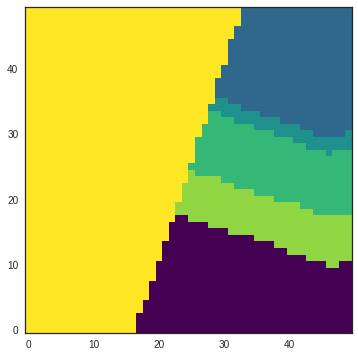

In [369]:
plt.imshow(lith_block.reshape(50,50,50)[:,25,:].T, origin='lower', cmap='viridis')

In [370]:
print(res)
print(res[:,2].shape)

x = res[:,0]
y = res[:,1]
z = res[:,2] 

g_min = np.argmin(z)
print(x[np.argmin(z)])
print(y[np.argmin(z)])

print(res[1616])


[[  0.           0.          23.78883875]
 [  1.           0.          23.53401037]
 [  1.           1.          23.75086374]
 ..., 
 [ 49.          47.          21.01704827]
 [ 49.          48.          21.34628804]
 [ 49.          49.          21.69764468]]
(3945,)
20.0
0.0
[ 20.           0.          13.78091711]


In [371]:
lith_block[fault_block.astype(bool)] = 6
lith_block2 = lith_block.reshape(50,50,50)
lith_block2[:,:,:min(z)] = 6
#hoz = lith_block2[:,:,min(z):]
#print(hoz)
#hoz.shape

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


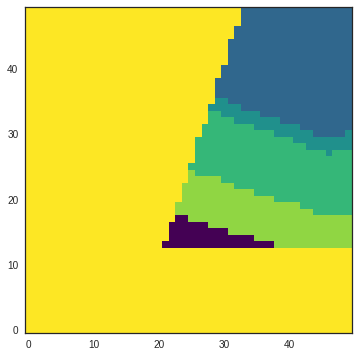

In [372]:
plt.imshow(lith_block2[:,25,:].T, origin='lower', cmap='viridis')

In [373]:
counter = 0
for i in lith_block:
    if lith_block[i] == 1:
        counter += 1
    
print(counter)

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


0


In [374]:
print(res[:,2][fault_block.astype(bool)])

/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 3945 but corresponding boolean dimension is 125000
  if __name__ == '__main__':


IndexError: index 3945 is out of bounds for axis 1 with size 3945

array([[  0.        ,   0.        ,  23.78883875],
       [  1.        ,   0.        ,  23.53401037],
       [  1.        ,   1.        ,  23.75086374],
       ..., 
       [ 49.        ,  47.        ,  21.01704827],
       [ 49.        ,  48.        ,  21.34628804],
       [ 49.        ,  49.        ,  21.69764468]])

In [3]:
from scipy.signal import argrelextrema

x = np.array([5,4,3,4,5,7,8,7,8,9])

# for local maxima
argrelextrema(x, np.greater)

# for local minima
argrelextrema(x, np.less)

(array([2, 7]),)

In [402]:
argrelextrema?

In [25]:
mini = argrelextrema(res[:,2], np.less, order=10)

In [26]:
res

array([[  0.        ,   0.        ,  23.78883875],
       [  1.        ,   0.        ,  23.53401037],
       [  1.        ,   1.        ,  23.75086374],
       ..., 
       [ 49.        ,  47.        ,  21.01704827],
       [ 49.        ,  48.        ,  21.34628804],
       [ 49.        ,  49.        ,  21.69764468]])

In [27]:
np.take(res[:,2], mini[0]).shape, res.shape

((65,), (3945, 3))

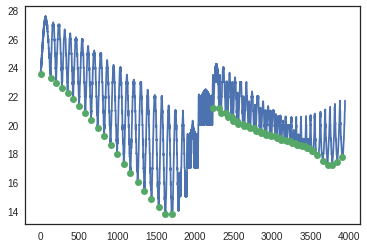

In [28]:
%matplotlib inline
plt.plot(res[:,2])
plt.plot( mini[0], np.take(res[:,2], mini[0]), 'o')

In [11]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(-res[:,1], -res[:,0], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
#ax.scatter(-non_res[:,1], -non_res[:,0], non_res[:,2], c='g')
ax.scatter(-np.take(res[:,1], mini[0]), -np.take(res[:,0], mini[0]), np.take(res[:,2], mini[0]), c='r', s = 100)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [386]:
argrelextrema?

In [376]:
print(res[0][2])

23.788838752


In [377]:
#clustering?

counter = 0

#to save z values in slices in
#yvals = [np.arange(0,50,1)]
#zvals = [np.arange(0,50,1)]
xvals = []
yvals = []
zvals = []
all_min = np.empty([3,], dtype=int)
print(all_min)

#array to save local mini in
#mins = []
#print(mins)

while counter < 50:
    for e in res:
        #print(e)
        if e[0] == counter:
            xvals.append(e[0])
            yvals.append(e[1])
            zvals.append(e[2])
          
    zvals = np.array(zvals)
    min_pos = argrelextrema(zvals, np.less)
    yvals = np.array(yvals)
    xvals = np.array(xvals)
    ypos = yvals[min_pos]
    xpos = xvals[min_pos]
    mins = zvals[min_pos]
    
    np.append(all_min, mins)
    #print(xpos)
    #print(ypos)
    #print(mins)
    mins_pos = np.array(list(zip(xpos, ypos, mins)))
    print(mins_pos)
    maxmin_pos = np.argmax(mins)
    #print(maxmin_pos)
    maxmin = (mins_pos[maxmin_pos,:])
    #print(maxmin)
    #print()
    all_min = np.vstack((all_min, mins_pos))
    #print(all_min)
    print()
    #xy_vals = zip(yvals, zvals)
    #print(xy_vals)
    xvals = []
    yvals = []
    zvals = []

    counter += 1
    


[                  0                   0 4607182418800017408]
[[  0.          34.          26.86344097]
 [  0.          39.          25.99254145]
 [  0.          44.          24.9182475 ]
 [  0.          49.          23.78988536]]

[[  1.          32.          26.90780937]
 [  1.          38.          25.9393848 ]
 [  1.          43.          24.87554906]
 [  1.          47.          23.97546896]]

[[  2.           0.          23.24903048]
 [  2.          29.          26.97942895]
 [  2.          37.          25.86320722]
 [  2.          42.          24.80649191]
 [  2.          46.          23.90207358]]

[[  3.           0.          22.9325946 ]
 [  3.          35.          25.94824044]
 [  3.          40.          24.9410094 ]
 [  3.          45.          23.79776734]
 [  3.          49.          22.93433781]]

[[  4.          33.          25.98832363]
 [  4.          39.          24.8324277 ]
 [  4.          43.          23.90388789]
 [  4.          47.          22.99481852]]

[[  

[[ 40.           2.          19.82231067]
 [ 40.           6.          18.92986701]
 [ 40.          11.          18.62632712]
 [ 40.          32.          18.92748343]
 [ 40.          38.          18.62649041]]

[[ 41.           2.          19.85269342]
 [ 41.           6.          18.92347632]
 [ 41.          12.          18.50545913]
 [ 41.          27.          18.96258969]
 [ 41.          37.          18.50708122]]

[[ 42.           2.          19.9036113 ]
 [ 42.           6.          18.94235589]
 [ 42.          14.          18.37143093]
 [ 42.          35.          18.37127506]]

[[ 43.           2.          19.98249268]
 [ 43.           6.          18.98699981]
 [ 43.          18.          18.19716433]
 [ 43.          31.          18.1978576 ]]

[[ 44.           3.          19.78356166]
 [ 44.           7.          18.87684778]
 [ 44.          18.          17.99227262]
 [ 44.          24.          17.87884724]]

[[ 45.           3.          19.91117171]
 [ 45.           7.     

In [382]:
print(all_min.shape)
print(maxmin.shape)

all_min = np.delete(all_min, 0, 0)
print(all_min)

(280, 3)
(3,)
[[  0.          34.          26.86344097]
 [  0.          39.          25.99254145]
 [  0.          44.          24.9182475 ]
 [  0.          49.          23.78988536]
 [  1.          32.          26.90780937]
 [  1.          38.          25.9393848 ]
 [  1.          43.          24.87554906]
 [  1.          47.          23.97546896]
 [  2.           0.          23.24903048]
 [  2.          29.          26.97942895]
 [  2.          37.          25.86320722]
 [  2.          42.          24.80649191]
 [  2.          46.          23.90207358]
 [  3.           0.          22.9325946 ]
 [  3.          35.          25.94824044]
 [  3.          40.          24.9410094 ]
 [  3.          45.          23.79776734]
 [  3.          49.          22.93433781]
 [  4.          33.          25.98832363]
 [  4.          39.          24.8324277 ]
 [  4.          43.          23.90388789]
 [  4.          47.          22.99481852]
 [  5.           0.          22.20071001]
 [  5.          31. 

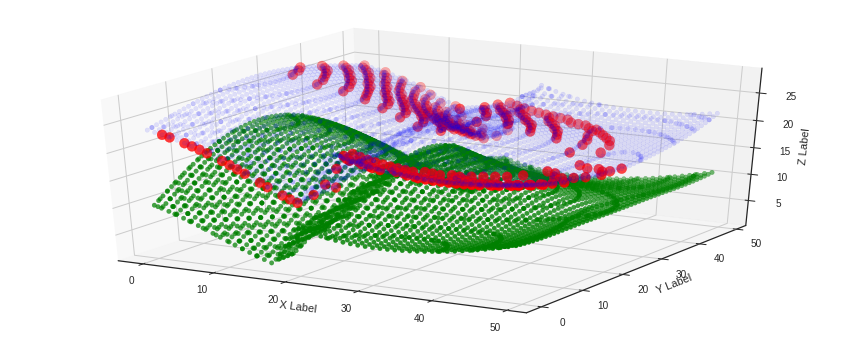

In [383]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

ax.scatter(res[:,0], res[:,1], res[:,2], c="b", alpha = 0.1)
#ax.scatter(seal[:,0], seal[:,1], seal[:,2], c='black')
ax.scatter(non_res[:,0], non_res[:,1], non_res[:,2], c='g')
ax.scatter(all_min[:,0], all_min[:,1], all_min[:,2], c='r', s = 100)
# ax.scatter(all_min[:,0], all_min[:,1], all_min[:,2], c='r', s = 100)
#what does marker=m do??

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()